In [ ]:
Main task:
    Run sentence tokenizer to convert raw text into list(each element in this list is a document) of list(each element in this list is sentence)
    t

In [1]:
import os
import pandas as pd
import pickle
import utils
import imp
import numpy as np
import math
from matplotlib import pyplot as plt

In [13]:
ratio = 2
src_dir = 'pu_data_ratio' + str(ratio) + '/'
text_train = pickle.load(open(src_dir+'text_train.pkl','rb'))
label_train = pickle.load(open(src_dir+'label_train.pkl','rb'))
text_test = pickle.load(open(src_dir+'text_test.pkl','rb'))
label_test = pickle.load(open(src_dir+'label_test.pkl','rb'))
text_train.extend(text_test)

In [9]:
ratio = 10
src_dir = 'pu_data_ratio_Clarity' + str(ratio) + '/'
text_train = pickle.load(open(src_dir+'text_train.pkl','rb'))
text_test = pickle.load(open(src_dir+'text_test.pkl','rb'))
text_train.extend(text_test)

In [31]:
def max_sent_len(sent_list):
    max_len = 0
    for sent in sent_list:
        tmp_len = len(sent.split())
        if tmp_len >max_len:
            max_len = tmp_len
    return max_len

In [43]:
imp.reload(utils)
extended_text_train = []
for doc in text_train:
    extended_doc = utils.cancat_to_20(doc)
    print(max_sent_len(extended_doc))
    extended_text_train.append(extended_doc)


51
80
65
41
69
47
35
74
39
62
43
50
43
51
38
64
43
61
62
21
52
47
39
27
43
23
47
45
57
37
37
58
53
70
84
44
45
75
44
43
36
57
55
36
37
76
47
51
80
57
56
51
46
53
47
56
49
48
69
52
37
49
51
35
61
71
97
56
51
22
41
62
54
45
41
56
46
42
44
74
50
98
39
27
42
45
57
129
85
49
47
39
32
40
49
47
50
58
53
52
87
45
44
57
51
56
42
35
54
64
50
52
90
26
33
50
42
48
22
67
49
66
37
61
75
44
52
51
61
61
67
78
41
44
38
50
46
50
57
38
49
64
75
58
45
40
41
54
55
62
50
50
69
38
59
45
69
101
62
51
51
41
37
36
46
55
58
47
73
53
69
40
81
47
39
46
49
48
52
45
58
47
38
137
61
59
46
38
52
53
62
53
55
55
48
68
26
51
46
30
70
44
49
81
42
46
57
85
47
57
66
60
54
54
42
41
77
45
29
48
74
60
39
44
54
39
35
45
86
48
77
61
45
58
71
37
40
39
58
44
49
49
52
60
61
61
46
37
60
46
23
49
43
42
44
49
44
43
67
53
47
52
68
37
59
24
40
49
57
63
50
44
48
58
56
49
39
54
32
49
141
80
48
52
50
44
54
71
51
66
104
60
47
50
61
49
49
63
69
48
33
55
55
57
88
46
61
40
45
83
65
40
72
27
44
41
23
38
23
83
51
63
54
42
52
84
56
53
89
36
71
41

50
93
45
53
61
50
48
56
40
37
45
37
69
75
41
57
62
52
48
49
46
77
58
48
95
43
52
49
42
26
51
27
55
80
40
37
44
59
62
58
42
50
47
45
57
47
50
55
74
61
93
67
48
58
67
58
36
53
65
55
43
60
51
54
49
57
45
23
60
26
44
71
37
49
51
34
34
49
47
66
57
41
40
46
51
43
50
50
49
59
59
58
46
48
38
26
65
44
44
48
39
81
38
52
53
52
79
40
61
62
26
80
65
50
25
74
63
43
32
68
82
48
56
44
40
65
55
61
88
58
54
49
68
40
48
51
49
45
49
23
49
42
63
73
40
44
55
73
50
53
49
60
48
49
46
49
61
48
47
54
43
55
46
44
43
74
50
51
38
43
43
45
61
71
54
50
45
80
50
34
66
71
51
50
47
66
49
69
75
58
47
42
43
49
51
55
45
47
51
50
60
46
42
53
45
54
54
71
59
59
78
55
71
55
41
54
63
57
54
50
44
62
54
76
114
41
32
49
49
32
38
58
56
54
66
53
53
50
116
24
46
29
39
90
44
59
52
38
54
83
41
52
54
47
62
73
46
57
48
38
42
63
45
31
45
64
56
43
63
48
39
40
95
41
34
43
57
54
58
33
65
42
51
49
62
48
53
59
49
70
61
68
52
37
43
51
56
44
68
37
73
66
37
49
47
47
48
76
53
41
23
37
42
43
30
67
28
44
107
55
58
45
40
56
49
23
48
47
47
52
53
49
4

80
59
64
37
41
60
65
38
50
48
50
43
48
42
52
75
36
42
63
43
64
53
46
58
48
54
41
42
40
38
83
86
50
37
64
75
57
54
51
31
51
54
47
64


In [3]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    print('upper_quartile: ' + str(upper_quartile))
    lower_quartile = np.percentile(a, 25)
    print('lower_quartile: ' + str(lower_quartile))
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

In [4]:
def plot_word_num(doc_list):
    import numpy as np
    import math
    from matplotlib import pyplot as plt
    sent_len_list = []
    for doc in doc_list:
        for sent in doc:
            sent_len_list.append(len(sent.split()))
    total_list_clean = removeOutliers(sent_len_list, 1.5)
    data2 = sent_len_list
    bins = np.linspace(math.ceil(min(data2)), 
                       math.floor(max(data2)),
                       40) # fixed number of bins
    plt.xlim([min(data2)-5, max(data2)+5])
    plt.hist(data2, bins=bins, alpha=0.5)
    return plt
    #plt.show()

In [5]:
def plot_sent_num(doc_list):
    import numpy as np
    import math
    from matplotlib import pyplot as plt
    doc_len_list = []
    for doc in doc_list:
        doc_len_list.append(len(doc))
    total_list_clean = removeOutliers(doc_len_list, 1.5)
    data2 = doc_len_list
    bins = np.linspace(math.ceil(min(data2)), 
                       math.floor(max(data2)),
                       40) # fixed number of bins
    plt.xlim([min(data2)-5, max(data2)+5])
    plt.hist(data2, bins=bins, alpha=0.5)
    return plt
    #plt.show()

In [56]:
index = 4
print(len(extended_text_train[index]))
print(len(text_train[index]))


49
119


In [10]:
len(text_train)

21681

upper_quartile: 11.0
lower_quartile: 2.0


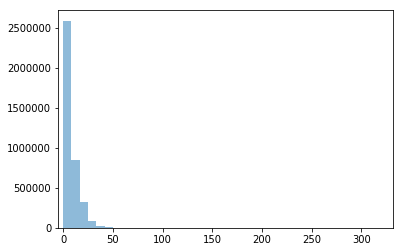

In [11]:
plt = plot_word_num(text_train)
plt.show()

In [13]:
text_train[1]

['Admission Date:',
 'Discharge Date:Date of Birth :',
 'Sex: M Service: SURGERY Allergies:',
 'Patient recorded as having No Known Allergies to Drugs',
 'Attending:',
 'Chief Complaint: ischemic left leg Major Surgical or Invasive Procedure: : Left guillotine below-knee amputation.:',
 '',
 'Debridement of necrotic muscle from the left calf and completion of left below-knee amputation: Left guillotine above-knee amputation, above-knee amputation fasciotomy.:Debridement of left above-knee amputation wound.:',
 '',
 'Revision and closure of left above knee amputation.',
 'History of Present Illness:',
 'This 64 y',
 '/o',
 'man with hx of CAD, multiple prior PCI/stents to LCX/OM last in, Ischemic cardiomyopathy with EF of 30% and extensive',
 'PAD s/',
 'p failed PCI S/P fem-bypass inpresented to ED onwith LLE ischemia for the last 2 days.',
 'Brought to angio and found to have thrombosed left common femoral artery to below the knee popliteal artery bypass graft.',
 'A thrombolysis cath

In [14]:
aaa = 'PTCAto LPLB with stenting for restenosis,stenting to proximal LCX complicated by distal edge dissection requiring distal stenting and subsequent rescue stenting into jailed OM complicated by stent thrombosis requiring rheolytic thrombectomy and subsequent residual distal LCX/LPDA T.O.PCI with stneting of Pcx and OMi1 -'
len(aaa.split())

44

upper_quartile: 240.0
lower_quartile: 105.0


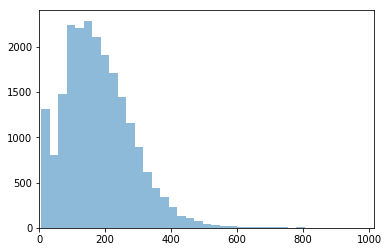

In [12]:
plt = plot_sent_num(text_train)
plt.show()

upper_quartile: 272.0
lower_quartile: 111.0


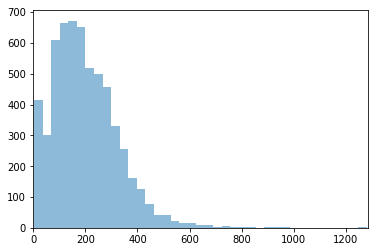

In [59]:
plt = plot_sent_num(text_train)
plt.show()

In [39]:
extended_text_train[0][0].split()

['Admission', 'Date:Discharge', 'Date:Date', 'of', 'Birth']

In [11]:
max_sent_len(aaa)

67

In [12]:
max_sent_len(text_train[1])

67

In [15]:
len(text_train[1])

100

In [16]:
for sent in text_train[1]:
    print(len(sent.split()))

1
1
2
4
3
1
29
22
12
11
20
9
11
4
18
10
3
67
18
9
10
32
12
16
15
4
12
4
1
1
6
16
12
21
16
41
11
8
1
1
12
9
11
11
14
8
13
10
13
3
21
6
1
1
13
13
6
18
1
2
18
23
15
9
1
1
14
1
4
1
1
7
7
15
12
1
16
18
13
9
13
23
23
3
3
1
2
1
7
1
3
25
9
1
9
12
1
2
1
1


In [2]:
src_dir = '/gpfs/qlong/home/tzzhang/mimicIII/nlp_data'
src_pos_file = os.path.join(src_dir,'pu_discharge.csv')
src_neg_file = os.path.join(src_dir,'nega_discharge.csv')
pos_df = pd.read_csv(src_pos_file)
neg_df = pd.read_csv(src_neg_file)


In [6]:
for col in pos_df.columns: 
    print(col) 

subject_id
hadm_id
category
text
ulcer_severity
ulcer_location
pressure_ulcer


In [4]:
def gene_text(num):
    for i in range(num):
        yield i
gene = gene_text(5)
for aaa in gene:
    print(aaa)

0
1
2
3
4


In [4]:
pos_text = pos_df['text'].to_list()

In [1]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)


Python version
3.5.2 (default, Feb 11 2019, 23:30:39) 
[GCC 5.4.0 20160609]
Version info.
sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


In [19]:
import spacy
import re

nlp = spacy.load('en')
boundary = re.compile('^[0-9]$')

def custom_seg(doc):
    prev = doc[0].text
    length = len(doc)
    for index, token in enumerate(doc):
        if (token.text == '.' and boundary.match(prev) and index!=(length - 1)):
            doc[index+1].sent_start = False
        prev = token.text
    return doc

nlp.add_pipe(custom_seg, before='parser')
text = u'This is first sentence.\nNext is numbered list.\n1. Hello World!\n2. Hello World2!\n3. Hello World!'
doc = nlp(text)
for sentence in doc.sents:
    print(sentence.text)
sents = list(doc.sents)

This is first sentence.

Next is numbered list.

1. Hello World!

2. Hello
World2!

3. Hello World!


In [24]:
str(sents[1])

'Next is numbered list.\n'

In [9]:
text = ''' DISCHARGE MEDICATIONS:  Norvasc 2.5 mg po q day,
Ciprofloxacin 500 mg po q 24 hours, Glipizide 10 mg po q day,
Plavix 75 mg po q day, aspirin 325 mg po q day, Zantac 150 mg
po q day, Colace 100 mg po b.i.d. and Lopressor 25 mg po
b.i.d.
.'''
text_no_cl = text.replace('\n',' ')

In [15]:
text = '''
Discharge Diagnosis:
upper GI bleed
peptic ulcer disease
H. pylori
coronary artery disease
'''
text_no_cl = text.replace('\n',' ')

In [16]:
sent_by_rule(text)
print("--------WITHOUT CHANGE LINE----------")
sent_by_rule(text_no_cl)

0 
Discharge Diagnosis:
upper GI bleed
peptic ulcer disease
H. pylori
coronary artery disease

--------WITHOUT CHANGE LINE----------
0  Discharge Diagnosis: upper GI bleed peptic ulcer disease H. pylori coronary artery disease


In [17]:
sent_by_model(text)
print("--------WITHOUT CHANGE LINE----------")
sent_by_model(text_no_cl)

0 
Discharge Diagnosis:
upper GI bleed
peptic ulcer disease
H. pylori
coronary artery disease

--------WITHOUT CHANGE LINE----------
0  Discharge Diagnosis: upper GI bleed peptic ulcer disease H. pylori coronary artery disease


In [23]:
text2 = '''
DISCHARGE MEDICATIONS:  Norvasc 2.5 mg po q day,
Ciprofloxacin 500 mg po q 24 hours, Glipizide 10 mg po q day,
Plavix 75 mg po q day, aspirin 325 mg po q day, Zantac 150 mg
po q day, Colace 100 mg po b.i.d. and Lopressor 25 mg po
b.i.d.
'''
text2_no_cl = text2.replace('\n',' ')
text2_no_bracket = text.replace()

In [11]:
sent_by_model(text)
print("--------WITHOUT CHANGE LINE----------")
sent_by_model(text_no_cl)

0  DISCHARGE MEDICATIONS:  
1 Norvasc 2.5 mg
2 po q day,
Ciprofloxacin
3 500 mg po q 24 hours, Glipizide 10 mg
4 po q day,
Plavix 75 mg po q day, aspirin 325 mg po q day
5 , Zantac 150 mg
po q day, Colace 100 mg po b.i.d. and Lopressor 25 mg po
b.i.d.
.
--------WITHOUT CHANGE LINE----------
0  DISCHARGE MEDICATIONS:  
1 Norvasc 2.5 mg
2 po q day
3 , Ciprofloxacin 500 mg po q 24 hours, Glipizide 10 mg
4 po q day, Plavix 75 mg
5 po q day, aspirin 325 mg po q day,
6 Zantac 150 mg
7 po q day
8 , Colace 100 mg po b.i.d. and Lopressor 25 mg po b.i.d. .


In [5]:
def sent_by_rule(text):
    import spacy
    from spacy.lang.en import English

    nlp = English()  # just the language with no model
    sentencizer = nlp.create_pipe("sentencizer")
    nlp.add_pipe(sentencizer)
    doc = nlp(text)
    numbered = enumerate(doc.sents)
    for i, sents in numbered:
        print(i, sents.text)

In [6]:
import spacy
def sent_by_model(text):
    nlp = spacy.load("en")
    doc = nlp(text)
    numbered = enumerate(doc.sents)
    for i, sents in numbered:
        print(i, sents.text)

In [26]:
a = 'asda asd sa asd das asd a asd 524 35 565 654'

In [29]:
a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [34]:
a = [1,2,3]
b = [4,5,6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.33, random_state=42)

In [35]:
X_train

[2, 3]

In [36]:
X_test

[1]

In [1]:
import json

# define list with values
basicList = [1, "Cape Town", 4.6]

# open output file for writing
with open('listfile.txt', 'w') as filehandle:  
    json.dump(basicList, filehandle)

In [2]:
import json

# open output file for reading
with open('listfile.txt', 'r') as filehandle:  
    basicList2 = json.load(filehandle)

In [3]:
basicList2

[1, 'Cape Town', 4.6]

In [ ]:
import utils
import imp
imp.reload(utils)
utils.data_generate(ratio = 10)

In [2]:
import sys
sys.path.append('/gpfs/qlong/home/tzzhang/nlp_test/ClarityNLP/nlp')

In [5]:
import nltk
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to
[nltk_data]     /export/qlong/home/tzzhang/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


True

In [7]:
import Sentence_tokenizer_from_Clarity as cla_token

In [8]:
text = '''
"Admission Date:  [**2132-12-31**]              Discharge Date:   [**2133-1-27**]

Date of Birth:  [**2076-5-13**]             Sex:   M

Service: MEDICINE

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending:[**First Name3 (LF) 2186**]
Chief Complaint:
Progressive signs of dizziness, visual difficulties, unsteady
gait

Major Surgical or Invasive Procedure:
Right-sided high frontal stereotactic biopsy, CT-guided target
point, definition and MRI-guided intraoperative imaging.


History of Present Illness:
The patient is a 56-year-old male with a history of colon
cancer, as well as testicular cancer, who presents with
progressive signs of dizziness, visual difficulties, unsteady
gait for approximately 12 months. He was worked up including an
MRI scan that showed a brainstem lesion. He was referred to the
brain tumor clinic for consideration of a biopsy.

The patient has been followed at the [**Hospital6 **] at [**Location 10050**]. He had been treated for a number of medical issues. He
was examined by Dr. [**Last Name (STitle) 66170**] whose physical exam reportedly
showed bilateral facial numbness and swaying, and a MRI of the
head was preformed. This demonstrated expansion of the
brainstem without significant contrast enhancement. The patient
was thus considered to have a brainstem glioma and started on
Decadron. The patient now presents for a surgical opinion. In
the office, the patient complains about dizziness, blurred
vision, double vision, occasional headaches, and unsteady gait.
He feels better with medications. He takes at baseline 2 Tylenol
a day. Has a history of arthritis in the lower back, otherwise,
he reports that the numbness in his hands has disappeared since
starting the Decadron. The patient has tapered his Decadron to a
dose of 2 mg p.o. b.i.d. The patient is otherwise feeling
himself stable. He was told that he had a left lazy eye at
baseline, but the patient is not quite sure about the symptoms.
He denies otherwise any extreme fatigue, weight loss or other
symptoms.


Past Medical History:
Hypertension
Hypercholesterolemia
Sigmoid colon cancer [**2125**]
Testicular cancer s/p Left orchiectomy and was found to be a
germ cell tumor T1, N0.was treated with adjuvant chemotherapy no
radiation.
Hemorrhoids
Recurrent bouts of thrush


Social History:
He is a high school graduate. He is an electrician. He is
divorced. He has no other people in the household. He has a
40-pack-year history of smoking. He drinks about three drinks a
week, and he denies any recreational drug use.



Family History:
His mother died at 63 of a heart attack. His father died at 44
after a MVA. He has two sisters 58 and 54, the 54-year-old has
gallbladder stones. Other than that, they both are healthy.
There are two brothers, one brother at 47 who has
hypertension and two daughters that are in good health.


Physical Exam:
GENERAL: He is alert, pleasant, middle-aged man in no acute
distress. Weight was 170 pounds, height was 74 inches, blood
pressure was 154/90, pulse of 96, respirations 20, temperature
of 97.4.

HEENT: The patient did have a head tilt to the left.
CARDIOVASCULAR: Regular rate and rhythm. No murmurs, gallops or
rubs.
LUNGS: Clear to auscultation.
EXTREMITIES: No clubbing, cyanosis or edema.

NEUROLOGIC: The patient is awake, alert and oriented. He has
bilateral reactive pupils. Eye movements are full and we cannot
detect a clear deficit of a particular muscle, at current, the
patient has no diplopia. Visual fields seem to be fully intact.
He has non-exhaustible end gaze nystagmus with rotatory
component. Face is symmetric. Tongue is midline. No
fasciculations. He has a hoarse voice. He has full strength
bilaterally. He has intact sensation and symmetric reflexes. The
patient does not have any memory problems, blackouts, nausea,
concentration, or speech problems, as well as hearing problems.
On motor examination, he was [**4-24**] bilaterally, normal tone, no
drift. I found no evidence of any weakness in his hands. Upper
sensory, he was intact to light touch throughout, and he was
intact to pinprick over in the hands
Reflexes were 2+ throughout.
Cerebellar: He had bilateral intention tremor in the hands as
well as finger tapping and rapid alternating movements were
fine. Foot tapping and heel-knee-shin was normal.
Gait: He had a wide based gait, he is unable to toe tandem or
heel walk.


Pertinent Results:
[**2132-12-31**] 09:40AM   GLUCOSE-116* LACTATE-1.2 NA+-132* K+-4.0
CL--95*
[**2132-12-31**] 09:40AM   TYPE-ART PO2-83* PCO2-35 PH-7.50* TOTAL
CO2-28 BASE XS-3 INTUBATED-INTUBATED VENT-SPONTANEOU COMMENTS-RM
AIR
[**2132-12-31**] 09:48AM   PT-11.1* PTT-21.2* INR(PT)-0.8
[**2132-12-31**] 09:48AM   PLT COUNT-241
[**2132-12-31**] 09:48AM   WBC-17.9* RBC-4.30* HGB-12.2* HCT-34.0*
MCV-79* MCH-28.4 MCHC-35.9* RDW-17.9*
[**2132-12-31**] 09:48AM   GLUCOSE-115* UREA N-16 CREAT-0.5 SODIUM-133
POTASSIUM-3.9 CHLORIDE-95* TOTAL CO2-26 ANION GAP-16
[**2132-12-31**] 11:21AM   freeCa-1.12
[**2132-12-31**] 11:21AM   HGB-11.1* calcHCT-33 O2 SAT-97 CARBOXYHB-1
[**2132-12-31**] 11:21AM   GLUCOSE-129* LACTATE-1.7 NA+-133* K+-3.9
CL--98*
.
Pathology [**2132-12-31**]:
MIDDLE CEREBELLAR PEDUNCLE/PONS STEREOTACTIC BRAIN BIOPSY
(including intraoperative smear):
DIFFUSELY INFILTRATING FIBRILLARY ASTROCYTOMA. WHO ([**2126**]) grade
II out of IV.
.


Brief Hospital Course:
56 M with PMH sigmoid and testicular ca in [**2125**], HTN, COPD,
admitted for new diagnosis pontine glioma s/p posterior fossa
decompression and necrotizing pna.
.
# Pontine glioma:
56 year-old man initially seen and discussed in brain tumor
clinic. Patient taken to OR on [**12-31**] for brainstem lesion biopsy
under general anesthesia. Postoperatively stayed in the PACU 6
hours then transferred to floor. On postop day one patient
demonstrated difficulty of swallowing which he failed his speech
and swallow evaluation. Patient kept NPO, started IV fluids. On
[**2133-1-2**] patient taken back to OR for a suboccipital chiari
decompression. Patient tranferred to neuro ICU for hemodymanic
and neurologic monitoring. Due to postoperaive respiratory
secretion extubated on [**2133-1-4**] after bronchcospy.
.
Brain stem biopsy pathology result is significant for
infiltrative astrocytoma. Radiation oncology decided not to
perform radiation mapping and to hold off for another several
weeks before planning to start XRT, since patient has a slow
growing glioma, and XRT could exacerbate pna.  Patient known by
Dr [**Last Name (STitle) 4253**] will follow up with him as scheduled.  Patient was
transferred to Step-down unit on [**2132-1-7**].  His speech continued
to become more articulate and clear, and his mental status
continued to become more clear.  The patient stated that his
dizziness has improved.
.
# Necrotizing pneumonia:
Patient has a known pulmonary process that been followed in
[**Hospital 669**] [**Hospital **] hospital in MA. In house repeat CT of the chest
significant for left lower lobe, consolidative opacity, with
central area of necrosis, an air-fluid level, and
low-attenuation material. Additionally, there are several areas
within the right and left lungs peripherally, with patchy
opacity and tree-in-[**Male First Name (un) 239**] opacities, concerning for multifocal
opacity. There is also a wedge-shaped opacity in the right lower
lung zone, some of which may represent atelectasis.There is a
3.3 x 2.6 cm nodule with multiple foci of calcification within
the left lower lobe. Attempt to obtain images from [**Hospital **] hospital
regarding pulmonary lesions for comparison, [**Name (NI) 653**] with
MEdical records to sent ua CD images. Medicine and
interventional pulmonary services recommended continue
antibiotics, and follow up with chest CT with and with out
contrast in 4 weeks in pulmonary clinic. In the mean time
[**Name (NI) 653**] with Dr [**First Name (STitle) **] at the [**Hospital **] hospital regarding
tranfering him over to VA regarding his known pulmonary process,
and colon carcinoma for further work up which he was agreed with
the transfer.
.
Pleural fluid culture grew out positive to MSSA, GNR, [**Female First Name (un) 564**]
albicans, staph coag neg. BAL culture grew out Stenotrophomonas
maltophila and Klebsiella sensitive to almost all abx tested.
ID was consulted and created antibiotic regimen of clindamycin,
bactrim, ceftriaxone, to be continued for 4-6 weeks.  Levo was
completed for 2 weeks (last date [**2133-1-27**]).  Patient should be
reassessed to refine abx regimen within 2-4 weeks.  The patient
greatly improved on suctioning and chest PT, maintaining >95% RA
on the floor.
.
The following labs will need to be followed up after discharge:
LFTs, mycolytic/fungal cx, Cdiff x3, legionella urinary antigen
.
# Urinary retention:
Patient had no urine output after foley was d/ced.  Straight
cath released 980 ml of urine.  After 2 days of straight caths,
patient recovered normal urination, and does not have a foley
upon discharge.
.
# Skin lesions:
Dermatology consulted in reference to his left deltoid skin
lesion, non-bleeding which is present for 5 year according to
patient. Dermotalogy recommended excision of the lesion to rule
out melanoma once acute issues resolved with Derm Surgery
([**Telephone/Fax (1) 2977**]).
.
# Anemia:
Patient's Hct was around 25 during admission.
.
# HTN:
Controlled.  Diltiazem and captopril were continued as per her
outpt regimen.
.
# Access: Picc placed [**2133-1-9**].

Medications on Admission:
The patient is a 56 y/[**Initials (NamePattern4) **] [**Last Name (NamePattern4) 4746**] with a PMH significant for sigmoid
and testicular cancer in '[**25**], HTN, and COPD who was admitted to
the neurosurgery service on [**2132-12-31**] with a new diagnosis of a
pontine mass after 1yr of progressive dizziness and ataxia. He
underwent a stereotactic bx on [**12-31**] showing a low grade glioma
and received a palliative posterior fossa expansion on [**1-2**].
.
Routine pre-op CXR revealed multiple opacities and a 3x3 cm well
demarcated cavitary lesion with an air/fluid level in left
posterior lung. Following his surgery, he was extubated w/out
event but required reintubation later that evening [**1-22**]
desaturation.  On [**1-3**], a chest CT was done which showed a
multifocal pneumonic process with LLL necrotizing PNA. He
underwent a bronch on [**1-4**] with BAL revealing MSSA and
stenotrophamonas and was started on Levofloxacin (now d10/14),
Vanco (since d/c), and Clinda (d10/42) at this time. Bactrim
(d5/14) was added on [**1-8**] when BAL grew stenotrophamonas.
.
During this time, he has been intermittantly hypoxic with thick
secretions requiring frequent suctioning.  Over the past 2d, he
has been afebrile and his secretions have cleared appreciably.
He has maintained his O2 sats on 4L NC.  Other than this, the
patient has been intermittantly hypertensive requiring the
addition of captopril to his outpatient regimen.  He has also
failed numerous speech and swallow evaluations requring NG tube
feeds to maintain his nutritional status.  From an oncologic
standpoint, his pontine lesion is not amenable to resection and
the plan is to initiate palliative radiation therapy.  Per
neurosurgery, his prognosis is extremely poor.  Finally, the
patient has requested transfer to the [**Location 1268**] VA system
over the past several days as he has received much of his care
at this hospital.  Discussions are still ongoing to facilitate
this transfer.
.
PMH:
1. Colon cancer
2. testicular cancer
3. Hemorrhoids
4. Hypertension.
5. Thrush.
6. Hypercholesterolemia.
.
Transfer Meds:
Acetaminophen
Albuterol
Bisacodyl
Captopril
Clindamycin
Dexamethasone
Diltiazem
Docusate
HSQ
Sulfameth/Trimethoprim
Oxycodone
Nystatin
Nicotine Patch
Levofloxacin
Lansoprazole
Ipratropium
ISS
.
PE: 97.0 (98.5), 124/72, 81, 21, 95% 4L NC
Gen: Cachetic [**Male First Name (un) 4746**] sitting up in a chair in NAD
HEENT: MMM, PERRLA, EOMI, O/P clear w/ NGT in posterior
oropharynx
Neck: No LAD, No JVD
CV: RRR, S1/S2 wnl, -M/R/G appreciated
Lungs: Decreased breath sounds bilaterally L>R w/ coarse
inspiratory sounds bilaterally and anteriorly, -wheezes
appreciated, dullness to percussion at the L base
Abd: S/NT/ND, +BS
Ext: -C/C/E, 2+ peripheral pulses bilaterally
Neuro: CN 2-12 grossly intact, dysarthric, strength 5/5 in the
RLE, on the LLE he has decreased dorsal flexion in the
foot/flexion and extension at the knee/flexion at the hip,
mildly decreased L grip strength compared to R hand
================
Micro:
- Sputum [**1-3**]: E. coli (pan-sensitive), Coag + staph
(pansensitive)
- BAL [**1-4**]: Stenotrophamonas (sensitive bactrim), Coag + staph
(MSSA), sparse GNR
- MRSA/VRE swab: negative
================
CTA [**2133-1-9**]:
1.  Some improvement in the consolidation in the left lower
lobe, although the large 4-cm cavitary lesion with an air-fluid
level persists, consistent with slight overall improvement in
necrotizing pneumonia.
2.  New small cavitary lesion in the left upper lobe, possibly
related to aspiration. Of note, the patient has a small hiatal
hernia.
3.  Improvement in some of the ground-glass opacities in the
right middle and upper lobes, with persistent 4-mm lung nodule.
4.  Similar slightly prominent right hilar and mediastinal lymph
nodes.
6.  No evidence of pulmonary embolism.
7.  Similar calcified lung mass, possibly a hamartoma, although
metastatic colon cancer cannot be excluded.
.
CT Head ([**2133-1-9**]): No definite change in the mass effect
associated with the brainstem glioma.  Interval development of a
small left frontal region subdural collection.
.
CXR [**2133-1-10**]: No interval change.  Persistent opacity at the left
base.  There is a 3.6-cm parenchymal opacity within the left
base as well which is also unchanged. There is no evidence for
overt pulmonary edema.  The lines and tubes are stable in
position.
================
A/P: 56 yo M admitted for dizziness/weakness.  Found to have a
pontine glioma now s/p posterior fossa decompression complicated
by necrotizing PNA and multiple episodes of hypoxia requiring
MICU level care.  Called out to medicine service for further
management of his infection and pulmonary status.
.
# Hypoxia: He has been stable over the past few days w/ better
maintained SpO2.  He has improved in the past w/with deep
suctioning. Chest CT c/w necrotizine PNA.  He is on levo ([**1-9**]
-> 2 weeks), and clinda ([**1-9**] -> 6 weeks). Bactrim was started
on [**1-8**] (x 2 weeks): BAL + for stenotrophamonas.
- wean O2 as tolerated on the floor
- Per thoracic staff ([**2133-1-10**]) pt will need CT guided drain
placement this week; ? if best to schedule PEG at same time to
minimize procedures
- continue levaquin, clindamycin, and bactrim for full course
- will need repeat CT in 1 month
- continue nebs prn
- continue aggressive pulmonary toilet
- incentive spirometry on the floor
.
# Lung nodule. Chest CT from the VA on [**8-25**] demonstrated 2
lesions in LLL (anterior and posterior) both of which were felt
to be stable compared to prior CT [**2-/2127**].
- await old films being mailed from the VA
- f/u IP/thoracic recs
.
# Brainstem glioma. Prognosis estimated at a couple of months
per neurosurg.  ? palliative radiation
- continue Decadron [**Hospital1 **] per neurosurgery
- continue prn pain meds
- Neurosurg following
- pt full code
- monitor CN exam, mental status, and strength exams
.
# Anemia. 4pt Hct drop on [**2133-1-9**], transfused on [**1-11**] w/
appropriate Hct elevation and has been stable overnight
- repeat Hct when called out to floor
- guaiac stools x3 then d/c if negative
- transfuse for Hct < 25
- continue PPI while on decadron
.
# HTN. BP well controlled on current regimen
- Continue diltiazem and captopril
- monitor BP and titrate prn
.
# Left deltoid lesion.
- f/u in Dermatologic surgery clinic on [**2133-1-15**] at 11am
.
# Communication: VA Chief - [**Telephone/Fax (3) 66171**].
Mrs. [**Name (NI) 66172**] (aunt) [**Telephone/Fax (1) 66173**] is HCP.
.
# FEN. TF's through NGT (failed video swallow again on [**2133-1-12**])
- continue aspiration precautions
- patient has decline PEG placement x2 per notes in chart
- will reevaluate patient's wishes once transferred to floor;
would be best to place PEG when placing drainage so as to
minimize procedures
- replete lytes prn
.
# Access: PICC line placed [**2133-1-9**]
.
# PPX. SC heparin, PPI, bowel regimen, ISS while on decadron,
replete lytes
.
# Code: Full
.
# Dispo: Patient would like to be transferred to [**Location 1268**]
VA. [**Name (NI) 1094**] aunt has a scheduled meeting today with Dr. [**Last Name (STitle) **]

Discharge Medications:
1. Acetaminophen 325 mg Tablet Sig: One (1) Tablet PO Q4-6H
(every 4 to 6 hours) as needed.
2. Bisacodyl 5 mg Tablet, Delayed Release (E.C.) Sig: Two (2)
Tablet, Delayed Release (E.C.) PO DAILY (Daily) as needed: Hold
for lose stool.
3. Docusate Sodium 150 mg/15 mL Liquid Sig: One (1)  PO BID (2
times a day).
4. Heparin (Porcine) 5,000 unit/mL Solution Sig: One (1)
Injection [**Hospital1 **] (2 times a day).
5. Insulin Regular Human 100 unit/mL Solution Sig: One (1)
Injection ASDIR (AS DIRECTED).
6. Albuterol-Ipratropium 103-18 mcg/Actuation Aerosol Sig: [**12-22**]
Puffs Inhalation Q6H (every 6 hours).
7. Nystatin 100,000 unit/mL Suspension Sig: Five (5) ML PO QID
(4 times a day) as needed.
8. Albuterol Sulfate 0.083 % Solution Sig: One (1)  Inhalation
Q6H (every 6 hours) as needed.
9. Oxycodone-Acetaminophen 5-325 mg Tablet Sig: 1-2 Tablets PO
Q4-6H (every 4 to 6 hours) as needed.
10. Hydromorphone 2 mg/mL Syringe Sig: One (1)  Injection Q4-6H
(every 4 to 6 hours) as needed.
11. Nicotine 14 mg/24 hr Patch 24HR Sig: One (1) Patch 24HR
Transdermal DAILY (Daily).
12. Lansoprazole 30 mg Susp,Delayed Release for Recon Sig: One
(1)  PO BID (2 times a day).
13. Polyvinyl Alcohol-Povidone 1.4-0.6 % Dropperette Sig: [**12-22**]
Drops Ophthalmic  PRN (as needed).
14. Diltiazem HCl 60 mg Tablet Sig: One (1) Tablet PO QID (4
times a day).
15. Levofloxacin in D5W 500 mg/100 mL Piggyback Sig: One (1)
Intravenous  Q24H (every 24 hours): Started on [**1-2**] Total of 14
days then d/c. .


Discharge Disposition:
Extended Care

Facility:
VA

Discharge Diagnosis:
Right brainstem lesion


Discharge Condition:
Neurologically stable


Discharge Instructions:
Monitor suboccipital staple sites for drainage, erthyma,
swelling, fever greater than 101.5, seizure activity, visual
changes, weakness, numbness or any other neurologic symptoms
that may be concerning.

Keep your all appointments as sheduled.

Followup Instructions:
Follow up with Dr [**Last Name (STitle) **] in 10 days  from [**1-2**] for wound check
and staple removal or can be removed at the [**Hospital **] hospital.
Follow up with Dr [**Last Name (STitle) 4253**](neurooncology) and Dr
[**Last Name (STitle) 3929**](Radiation oncology) in brain tumor clinic on [**2133-1-26**]
at 1300 [**Hospital Ward Name 516**] [**Hospital Ward Name 23**] Building [**Location (un) **].

Follow up with Pulmonary Clinic in 4 weeks with a Chest CT with
and without contrast.

Follow up with Dr [**First Name (STitle) **], Dermatologic surgery
clinic([**Telephone/Fax (1) 2977**]for left deltoid lesion on [**2133-1-15**] at
1100.

Follow up with VA infectious disease for possible repeat CT
chest in 4 weeks.



Completed by:[**2133-1-27**]"
'''

In [9]:
print(text)


"Admission Date:  [**2132-12-31**]              Discharge Date:   [**2133-1-27**]

Date of Birth:  [**2076-5-13**]             Sex:   M

Service: MEDICINE

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending:[**First Name3 (LF) 2186**]
Chief Complaint:
Progressive signs of dizziness, visual difficulties, unsteady
gait

Major Surgical or Invasive Procedure:
Right-sided high frontal stereotactic biopsy, CT-guided target
point, definition and MRI-guided intraoperative imaging.


History of Present Illness:
The patient is a 56-year-old male with a history of colon
cancer, as well as testicular cancer, who presents with
progressive signs of dizziness, visual difficulties, unsteady
gait for approximately 12 months. He was worked up including an
MRI scan that showed a brainstem lesion. He was referred to the
brain tumor clinic for consideration of a biopsy.

The patient has been followed at the [**Hospital6 **] at [**Location 10050**]. He had been treated for a numbe

In [14]:
import imp
import time
imp.reload(cla_token)
start = time.time()
for i in range(10):
    list_of_sent = cla_token.parse_sentences_spacy(text)
print(time.time() - start)

Segmentation init...
19.439895153045654


In [12]:
list_of_sent

['"Admission Date:',
 '[**2132-12-31**]',
 'Discharge Date:',
 '[**2133-1-27**] Date of Birth:',
 '[**2076-5-13**]',
 'Sex: M Service: MEDICINE Allergies:',
 'Patient recorded as having No Known Allergies to Drugs',
 'Attending:',
 '[**First Name3 (LF) 2186**] Chief Complaint: Progressive signs of dizziness, visual difficulties, unsteady gait Major Surgical or Invasive Procedure: Right-sided high frontal stereotactic biopsy, CT-guided target point, definition and MRI-guided intraoperative imaging.',
 'History of Present Illness:',
 'The patient is a 56-year-old male with a history of colon cancer, as well as testicular cancer, who presents with progressive signs of dizziness, visual difficulties, unsteady gait for approximately 12 months.',
 'He was worked up including an MRI scan that showed a brainstem lesion.',
 'He was referred to the brain tumor clinic for consideration of a biopsy.',
 'The patient has been followed at the [**Hospital6 **] at [**Location 10050**].',
 'He had been 

In [15]:
type(list_of_sent)

list